#  Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
font = {'size'   : 20,
        'weight' : 'bold'}
matplotlib.rc('font', **font)
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Loading Data

In [5]:
data = pd.read_csv("D:\Farooq\Fault_Seal\_0.csv")

# Facies Analysis

In [6]:
_1 =  data[data["VCL"]<=0.35].index
data.loc[_1,"BED"]=0
_2 =  data[data["VCL"]>0.35].index
data.loc[_2,"BED"]=1

# Throw

In [7]:
bed = pd.concat([data["BED"]]*100,axis=1)
throw = pd.DataFrame(np.arange(0.1,200,0.1),columns=["throw"])
throw.loc[0,"DEPTH"] = data["DEPTH"].min()
throw.loc[len(throw)-1,"DEPTH"] = data["DEPTH"].max()
throw = throw.interpolate()
throw

,throw,DEPTH
0,0.1,3346.009300
1,0.2,3346.068033
2,0.3,3346.126765
3,0.4,3346.185498
4,0.5,3346.244231
...,...,...
1994,199.5,3463.122269
1995,199.6,3463.181002
1996,199.7,3463.239735
1997,199.8,3463.298467


In [8]:
ff = interp1d(data["DEPTH"],data["BED"],kind="nearest")
throw["BED"] = ff(throw["DEPTH"])

ff = interp1d(data["DEPTH"],data["VCL"])
throw["VCL"] = ff(throw["DEPTH"])

In [9]:
data2 = data.copy()

In [10]:
throw1_index = throw[throw["BED"]==1].index
throw1 = throw.copy()
throw1.loc[throw1_index,"BED"] = np.nan

# Fault Seal Analysis

In [12]:
d1 = []
z1 = []
depth=[]
for i in throw1.index:
    if throw1.loc[i,"BED"]==0:
        d1.append(throw.loc[i]["throw"])
        z1.append(i)
        depth.append(throw["DEPTH"].iloc[i])
    elif throw1.loc[i,"BED"]==1:
        d1.append(np.nan)
        depth.append(0)

In [14]:
aaa = []
bbb = []
ccc = []
ddd = []
eee = []
ggg = []
for i in range(len(d1)-1):
 
    a = throw1.loc[z1[i]:].iloc[0]["throw"]
    b = throw1.loc[z1[i]:].reset_index(drop=True)
    z3 = b["throw"]-a
    ggg.append(b["BED"].values)
    ddd.append(z3)

    depth1 = b["DEPTH"].values
    eee.append(depth1)


    throw11_index = b[b["BED"]==1].index
    throw11 = b.copy()
    throw11.loc[throw11_index,"BED"] = np.nan

    d2 = []
    z2 = []
    depth2=[]
    for iii in b.index:
        if b.loc[iii,"BED"]==0:
            d2.append(b.loc[iii]["throw"])
            z2.append(iii)
            depth2.append(b["DEPTH"].iloc[iii])
        else:
            d2.append(np.nan)
            depth2.append(0)
    depth2 = [0]+depth2

    thickness1=[]
    for ii in range(len(depth2)-1):
        if depth2[ii]==0:
            thickness1.append(depth2[ii])
            if depth2[ii+1]>0:
                z = depth2[ii+1]
        elif (depth2[ii]>0) :
            thickness1.append(depth2[ii]-z)

    if len(thickness1)!=len(depth2):
        depth2 = depth2[1:]
        aaa.append(depth2)  
        bbb.append(thickness1)
        cc = ((b["VCL"]*np.array(thickness1))/z3)*100
        ccc.append(cc)
        print(len(cc),len(thickness1),len(depth2),len(z3),len(depth1))
    else:
        aaa.append(depth2)
        bbb.append(thickness1)
        cc = ((b["VCL"]*np.array(thickness1))/z3)*100
        ccc.append(cc)
        print(len(cc),len(thickness1),len(depth2),len(z3),len(depth1))
#         break
ff1 = pd.DataFrame(np.concatenate(aaa))
ff1["ff2"] = np.concatenate(bbb)
ff1["ff3"] = np.concatenate(ccc)/10
ff1["ff4"] = np.concatenate(ddd)
ff1["ff5"] = np.concatenate(eee)
ff1["ff6"] = np.concatenate(ggg)
ff1 = ff1.replace([np.nan],1)
ff1.loc[ff1[ff1["ff3"]>1].index,"ff3"]=1    

1867 1867 1867 1867 1867
1866 1866 1866 1866 1866
1865 1865 1865 1865 1865
1864 1864 1864 1864 1864
1863 1863 1863 1863 1863
1862 1862 1862 1862 1862
1861 1861 1861 1861 1861
1860 1860 1860 1860 1860
1859 1859 1859 1859 1859
1858 1858 1858 1858 1858
1857 1857 1857 1857 1857
1856 1856 1856 1856 1856
1855 1855 1855 1855 1855
1854 1854 1854 1854 1854
1853 1853 1853 1853 1853
1852 1852 1852 1852 1852
1851 1851 1851 1851 1851
1850 1850 1850 1850 1850
1849 1849 1849 1849 1849
1848 1848 1848 1848 1848
1847 1847 1847 1847 1847
1846 1846 1846 1846 1846
1845 1845 1845 1845 1845
1844 1844 1844 1844 1844
1843 1843 1843 1843 1843
1842 1842 1842 1842 1842
1841 1841 1841 1841 1841
1840 1840 1840 1840 1840
1839 1839 1839 1839 1839
1838 1838 1838 1838 1838
1837 1837 1837 1837 1837
1836 1836 1836 1836 1836
1835 1835 1835 1835 1835
1834 1834 1834 1834 1834
1833 1833 1833 1833 1833
1832 1832 1832 1832 1832
1831 1831 1831 1831 1831
1830 1830 1830 1830 1830
1829 1829 1829 1829 1829
1828 1828 1828 1828 1828


# Plotting Data

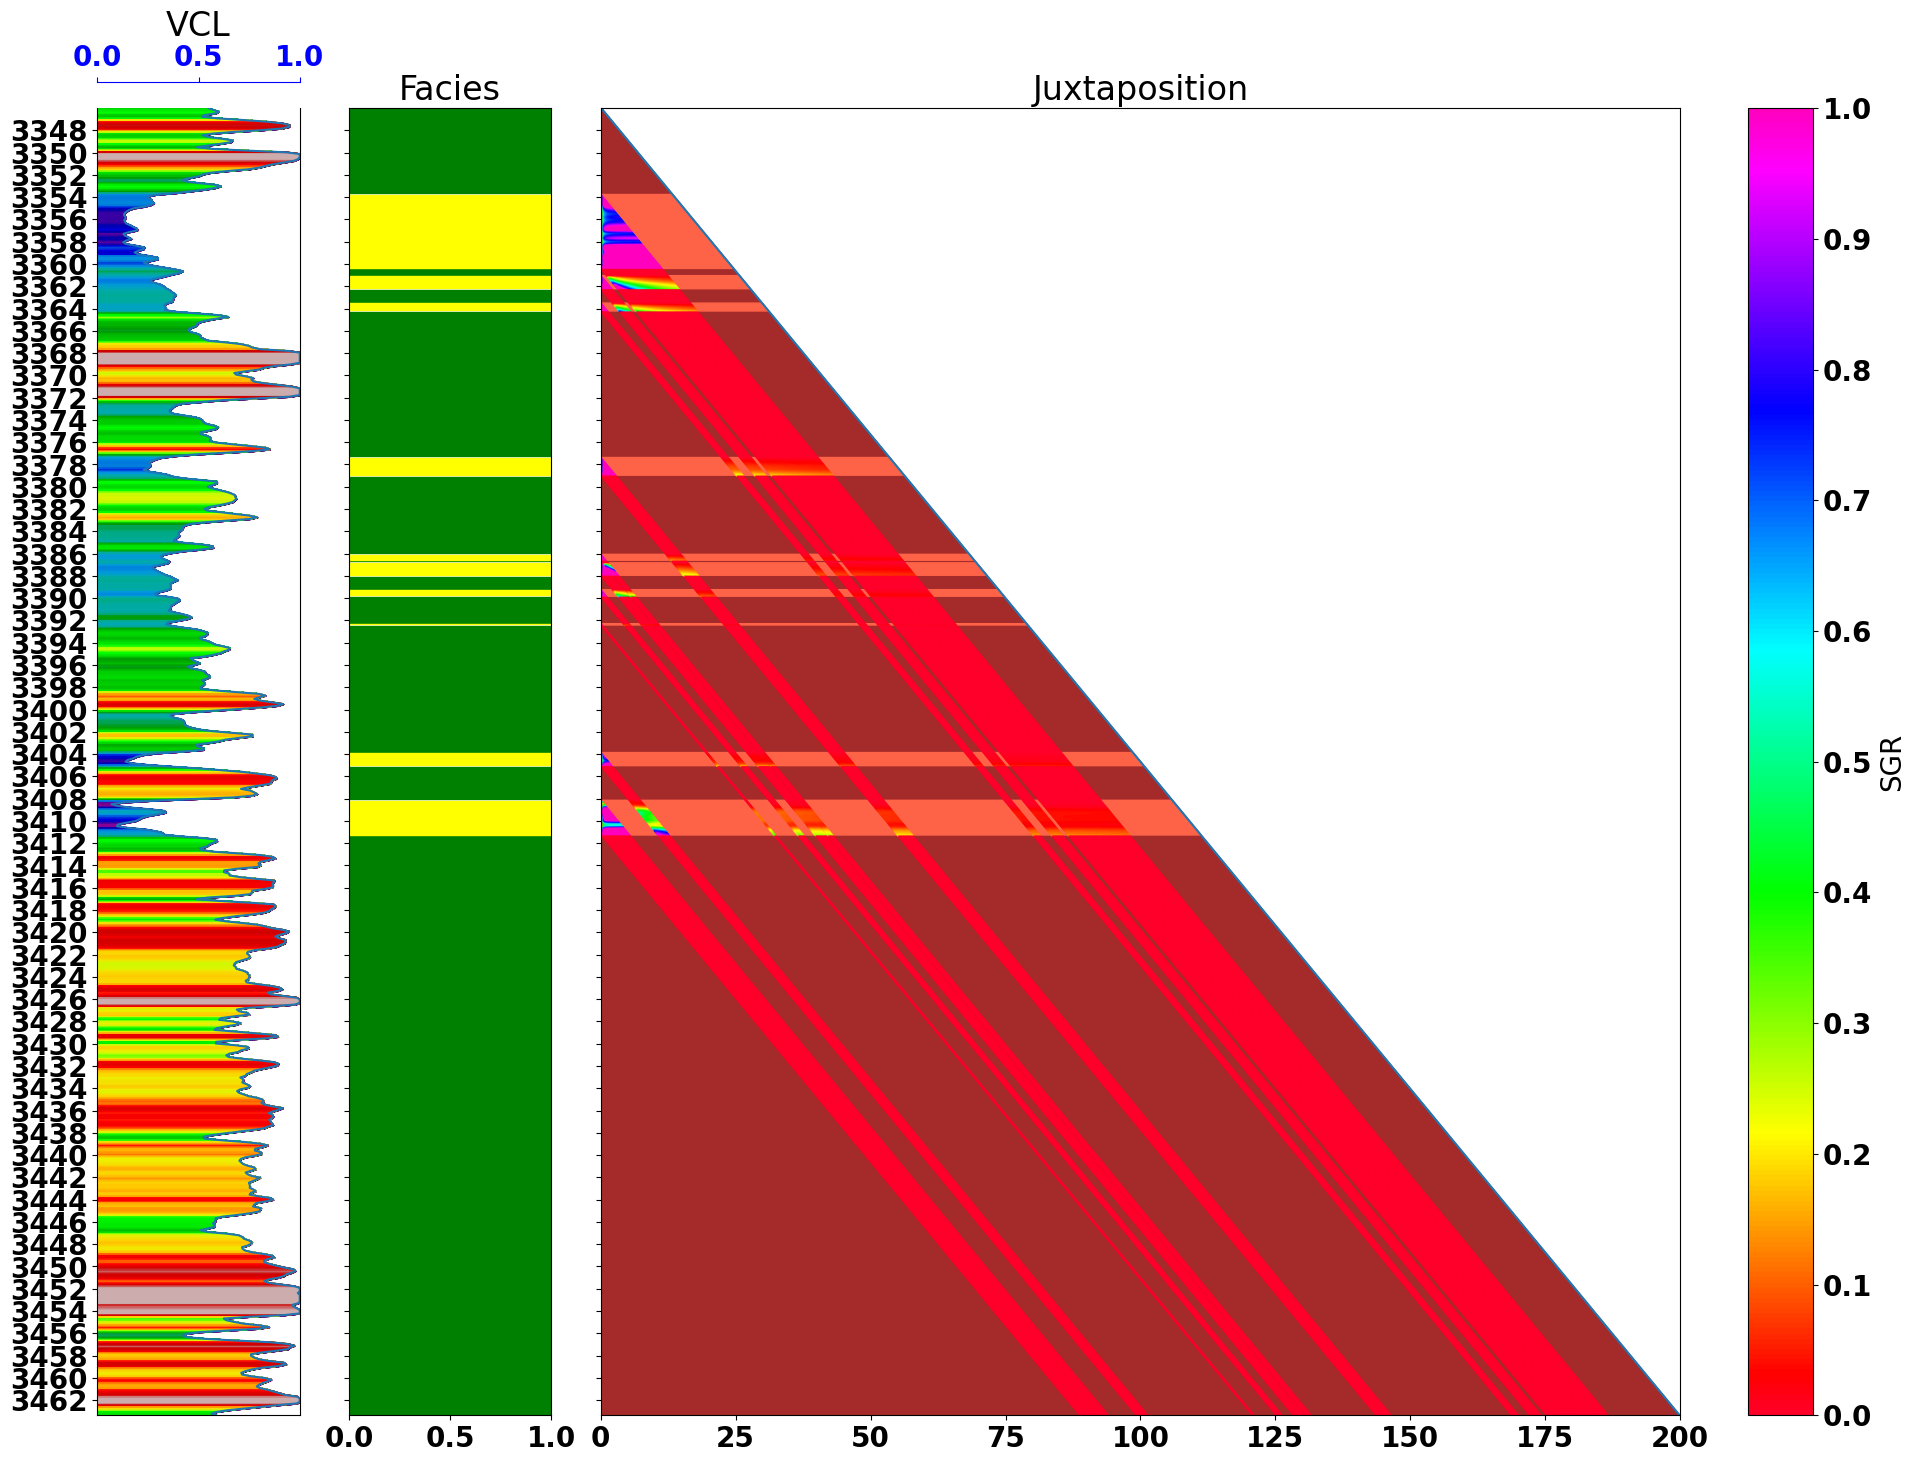

In [19]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(20,15),sharey=True,gridspec_kw={'width_ratios':[3,3,20]})
ax[0].set_title("VCL")

left_col_value = 0
right_col_value = 1
curve = data["VCL"]
span = abs(left_col_value - right_col_value)
cmap = plt.get_cmap('nipy_spectral')
color_index = np.arange(left_col_value, right_col_value, span / 100)

ax[0].plot('VCL','DEPTH', c='black', lw=0.5,data=data)
ax[0].set_xlim(0, 1)
ax[0].axis(ymin=max(data["DEPTH"]),ymax= min(data["DEPTH"]))
ax[0].xaxis.set_ticks_position("top")
ax[0].xaxis.set_label_position("top")
ax[0].xaxis.label.set_color("blue")
ax[0].yaxis.label.set_color("green")
ax[0].spines["top"].set_position(("axes", 1.02))
ax[0].tick_params(axis='x', colors="blue")
ax[0].spines["top"].set_edgecolor("blue")
for index in sorted(color_index):
    index_value = (index - left_col_value)/span
    color = cmap(index_value) #obtain colour for color index value
    ax[0].fill_betweenx(data['DEPTH'], 0 , curve, where = curve >= index,  color = color)
ax[0].set_yticks(np.arange(int(data["DEPTH"].min()),int(data["DEPTH"].max()),2))
ax[1].set_title("Facies")
ax[2].set_title("Juxtaposition")
ax[0].plot(data["VCL"],data["DEPTH"])
ax[0].set_ylim([data["DEPTH"].max(),data["DEPTH"].min()])
ax[1].fill_betweenx(data["DEPTH"],0,1,color="green",where=data["BED"]==1)
ax[1].fill_betweenx(data["DEPTH"],0,1,color="yellow",where=data["BED"]==0)
ax[1].set_xlim([0,1])
ax[2].plot(throw["throw"],throw["DEPTH"])
ax[2].fill_betweenx(throw["DEPTH"],0,throw["throw"],color="brown")
ax[2].fill_betweenx(throw["DEPTH"],0,throw["throw"],color="tomato",where = throw["BED"]==0)
ax[2].set_xlim([0,200])
im = ax[2].scatter(ff1["ff4"],ff1["ff5"],s=0.1,c=ff1["ff3"],cmap="gist_rainbow")
fig.colorbar(im, ax=ax[2],ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],label="SGR")
plt.tight_layout()
